# Lab 1. Real time crawling of tweets from Twitter and creating a network of user mentions

### Step 1: Install and import tweepy library

In [23]:
import os
import tweepy as tw
import pandas as pd

### Step 2: Sign up your twitter developer account and obtain the following credentials (https://developer.twitter.com/en)¶

In [24]:
consumer_key= "7yLjajg6lLMMe2bbbEF6Ktfc2"
consumer_secret= 'UJh95nM6mDd5gXeWykSavgpC0Wa26C1KxQQooocJwL9EA3dpYs'
access_token= '1552133988893962240-DanT0Dh3x9Hfd5siFhR9JeCAecUrpq'
access_token_secret= 'GvnDbnQlMA6VCX20yQHgOiqUuFc4KQpQmLsXEMplMlVlh'

### Step 3: Using the above credentials get yourself authorized to stream real time tweets using the code snippet below

In [25]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth,wait_on_rate_limit=True)

In [26]:
MY_BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAHgYfQEAAAAAf81mN3BgkfJemyfBH0PudataXdE%3DKv43FsPh9Z0K9zpay5qcoED9Jq1ys3OC7FckYHKKpcXXtHwbMX"

# create your client
client = tw.Client(bearer_token=MY_BEARER_TOKEN)

In [29]:
# query to search for tweets
query = "#Thunivu"


# get tweets from the API
tweets = client.search_recent_tweets(query=query,
                                     tweet_fields = ["created_at", "text", "source"],
                                     user_fields = ["name", "username", "location", "verified", "description"],
                                     max_results = 10,
                                     expansions='author_id'
                                     )

In [30]:
tweets

Response(data=[<Tweet id=1587655646371274752 text='RT @ONLINE_DAFC: #AjithKumar #Thunivu 🥵💯\n\nhttps://t.co/nGEybRYzLH'>, <Tweet id=1587655644878082049 text='RT @AFC__Dindigul: Man of humbleness ❤️ #AjithKumar !!\n\nGood Morning Ak Devotees ❤️\u200d🔥\n\n#Thunivu #ThunivuPongal https://t.co/wsvRNolpMb'>, <Tweet id=1587655644718706688 text='RT @iamdines19: Where is Endhiran movie.. Not in the list 🧐🧐🧐top 50 list la ilaya🧐\n\nSo comscore is also fake? \n\n#Thunivu #ThunivuPongal #Aj…'>, <Tweet id=1587655640125964288 text='RT @HVinothDirector: King arrived very very  soon 🔥🔥\n#ThunivuPongal\n#Thunivu'>, <Tweet id=1587655639782019072 text='RT @iam_Prabastark: He is the hero and he is the villain ‼️ \n\n#ThunivuPongal #Thunivu #Ajithkumar https://t.co/9VwmbyJwdT'>, <Tweet id=1587655637248638976 text='RT @BLSTG: Only way for #Thunivu to beat #Varisu in Overseas :\n\n#Thunivu needs to get highly positive WOM and #Varisu to get disaster WOM..…'>, <Tweet id=1587655623067549696 text='RT @ThalaFan

### Step 4: Using the API object search tweets of your interest using a particular hashtag

In [31]:
import pandas as pd
# create a list of records
tweet_info_ls = []
# iterate over each tweet and corresponding user details
for tweet, user in zip(tweets.data, tweets.includes['users']):
    tweet_info = {
        'created_at': tweet.created_at,
        'text': tweet.text,
        'source': tweet.source,
        'name': user.name,
        'username': user.username,
        'location': user.location,
        'verified': user.verified,
        'description': user.description
    }
    tweet_info_ls.append(tweet_info)
# create dataframe from the extracted records
tweets_df = pd.DataFrame(tweet_info_ls)
# display the dataframe
tweets_df.head()

,created_at,text,source,name,username,location,verified,description
0,2022-11-02 03:59:37+00:00,RT @ONLINE_DAFC: #AjithKumar #Thunivu 🥵💯\n\nht...,Twitter for Android,𝘉𝘏ム𝘙ム𝘛𝘏,iam_aj_ironman,Miss U Appa 💔,False,🅱🅴🄻🄸🄴🅅🄴 🄸🄽 🆈🅾🆄🅁🅂🄴🄻🄵 \n ♦️ eɴɴαм pol v...
1,2022-11-02 03:59:37+00:00,RT @AFC__Dindigul: Man of humbleness ❤️ #Ajith...,Twitter for Android,கார்த்திக்,Karthik_off01,"Dindigul, India",False,"To grow everyday, learn everyday."
2,2022-11-02 03:59:37+00:00,RT @iamdines19: Where is Endhiran movie.. Not ...,Twitter Web App,கடல்தானை🤴𓃵,Murali_speaks,None,False,Old accnt @murali_unoffl\n#என்றும்_தலஅஜித்\n#க...
3,2022-11-02 03:59:36+00:00,RT @HVinothDirector: King arrived very very s...,Twitter for Android,𝐌𝐚𝐫𝐢𝐚♪,itz_MariaAK92,None,False,
4,2022-11-02 03:59:36+00:00,RT @iam_Prabastark: He is the hero and he is t...,Twitter for Android,S Naveen kumar Thala ajith,naveen_thank,None,False,I like reading Rajesh Kumar novel


### Step 6: Import the networkx package

In [32]:
import networkx as nx

### Step 7: First create a basic network with few nodes and edges

In [33]:
G= nx.Graph()
G.add_nodes_from(["A","B"])
G.add_edge('A',"B")
G.nodes()

NodeView(('A', 'B'))

In [34]:
G.nodes['A']['Age']=21
G.nodes['B']['Age']=22
G.edges['A','B']['Friendship']= '2019/04/21'

In [35]:
G.nodes(data=True)

NodeDataView({'A': {'Age': 21}, 'B': {'Age': 22}})

In [36]:
G.add_edge(1, 2)
G.edges()

EdgeView([('A', 'B'), (1, 2)])

In [37]:
G.edges(data= True)

EdgeDataView([('A', 'B', {'Friendship': '2019/04/21'}), (1, 2, {})])

In [38]:
eg=[(1,2),(1,3),(1,4),(1,5),(1,6)]
H=nx.Graph(eg)

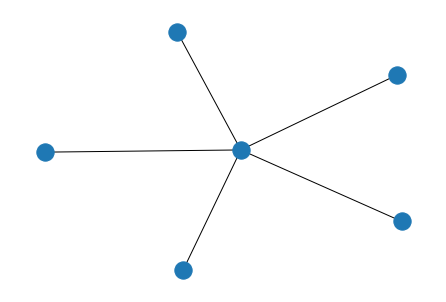

In [39]:
nx.draw(H)

In [40]:
# Generate in-degree centrality for retweets 
rt_centrality = ____

# Generate in-degree centrality for replies 
reply_centrality = ____

# Store centralities in DataFrame
rt = pd.DataFrame(list(____), columns = column_names)
reply = pd.DataFrame(list(____), columns = column_names)

# Print first five results in descending order of centrality
print(rt.sort_values('degree_centrality', ascending = False).head())

# Print first five results in descending order of centrality
print(reply.sort_values('degree_centrality', ascending = False).head())

NameError: name '____' is not defined

max degree is  1205
total degree list is Cd(v) =   [24, 7, 3, 7, 5, 19, 122, 154, 105, 6, 11, 51, 11, 265, 105, 1, 36, 14, 18, 1, 10, 16, 15, 15, 20, 1, 107, 9, 19, 1, 37, 15, 54, 8, 112, 37, 77, 86, 17, 19, 4, 6, 21, 24, 2, 105, 2, 5, 3, 2, 17, 16, 41, 2, 47, 10, 32, 1, 88, 4, 34, 22, 3, 104, 21, 11, 2, 55, 7, 8, 1, 17, 1, 27, 63, 19, 17, 8, 7, 7, 77, 7, 17, 129, 12, 4, 81, 19, 190, 15, 26, 1, 31, 18, 28, 47, 3, 75, 5, 13, 28, 46, 33, 5, 58, 3, 4, 61, 1, 7, 10, 79, 71, 4, 2, 1, 81, 5, 7, 4, 7, 14, 3, 4, 8, 84, 6, 32, 45, 7, 2, 31, 21, 6, 38, 49, 3, 2, 12, 50, 28, 3, 25, 15, 27, 46, 3, 3, 29, 53, 10, 34, 1, 3, 13, 10, 2, 10, 23, 61, 3, 6, 3, 51, 10, 36, 86, 9, 27, 3, 6, 3, 57, 1, 2, 35, 5, 7, 8, 71, 6, 1, 35, 8, 111, 64, 25, 43, 7, 22, 54, 108, 1, 16, 1, 18, 1, 26, 21, 4, 17, 19, 11, 6, 22, 120, 70, 3, 16, 26, 20, 16, 6, 1, 202, 22, 29, 7, 21, 28, 102, 47, 76, 103, 21, 14, 42, 50, 49, 10, 20, 126, 230, 11, 40, 6, 1, 9, 42, 2, 4, 3, 4, 33, 13, 9, 1, 3, 246, 28, 15, 5, 41, 23, 153, 2, 1,

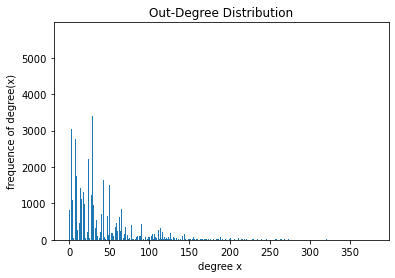

In [42]:
import ast
from collections import Counter
import matplotlib.pyplot as plt

if __name__ == "__main__":
    twitter_nodes = 81306
    degree_file = "out_degree.csv"
    # degree_file = "in_degree.csv"

    max_degree = 0
    degree_list = []
    with open(degree_file, 'r')as file:
        for line in file:
            size = len(ast.literal_eval(line.split(":")[1]))
            degree_list.append(size)

    max_degree = max(degree_list)

    print("max degree is ", max_degree)
    print("total degree list is Cd(v) =  ", degree_list)

    sum = 0
    for i in degree_list:
        sum += max_degree - i
    degree_centrality = sum / (twitter_nodes - 1) * (twitter_nodes - 2)
    print("degree_centrality(G)", degree_centrality)

    plt.xlabel('degree x ')
    plt.ylabel('frequence of degree(x)')
    plt.title('Out-Degree Distribution')
    # plt.title('In-Degree Distribution')

    counts = Counter(degree_list)
    plt.bar(range(len(counts)), counts.values())
    plt.show()